<a href="https://colab.research.google.com/github/cszafariqbal/Prodigy-ML-Task/blob/main/Task2_K_means_Algorithm_to_Groupe_of_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abstraction


* Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

#Upload the Dataset into Google Colab

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


#Import The Dataset

In [88]:
import pandas as pd
import numpy as np

In [89]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#Data Preprocessing & Cleaning

In [90]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [91]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [92]:
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [93]:
customer_data.duplicated().sum()


0

#Data Visualization

In [94]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [95]:
px.histogram(customer_data, x='Gender', title='Count Gender')

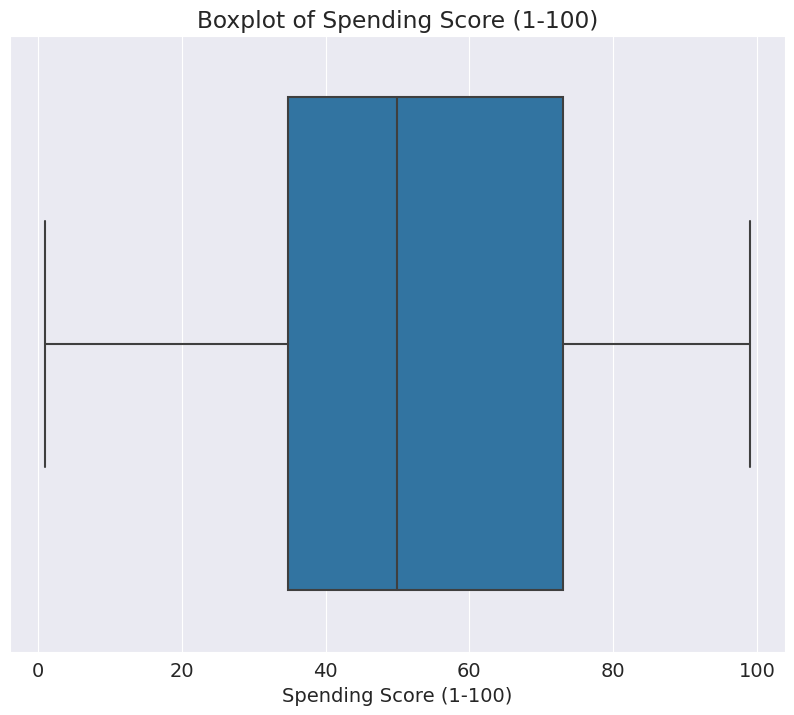

In [96]:
plt.figure( figsize=(10, 8))
sns.boxplot(data =customer_data, x='Spending Score (1-100)')
plt.title('Boxplot of Spending Score (1-100)')
plt.show()

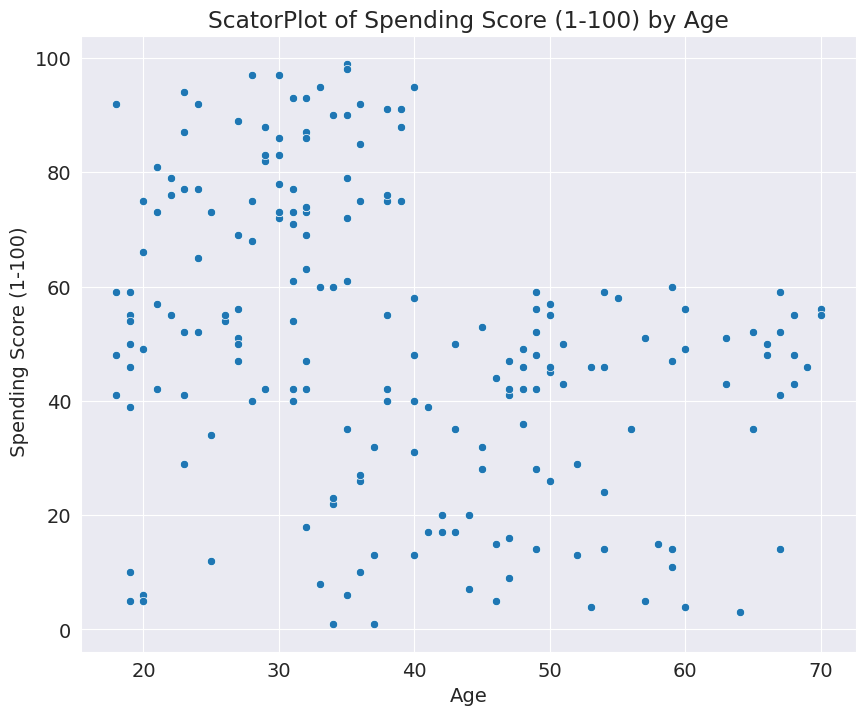

In [97]:
plt.figure( figsize=(10, 8))
sns.scatterplot(data =customer_data, y='Spending Score (1-100)', x='Age')
plt.title('ScatorPlot of Spending Score (1-100) by Age')
plt.xlabel('Age')
plt.ylabel(' Spending Score (1-100)')
plt.show()

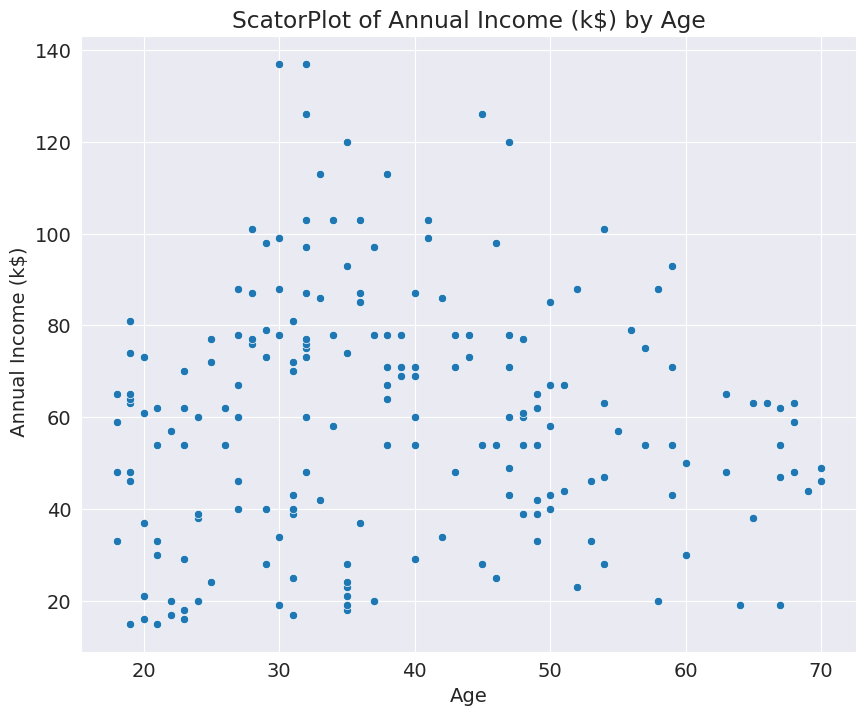

In [98]:
plt.figure( figsize=(10, 8))
sns.scatterplot(data =customer_data, y='Annual Income (k$)', x='Age')
plt.title('ScatorPlot of Annual Income (k$) by Age')
plt.xlabel('Age')
plt.ylabel(' Annual Income (k$)')
plt.show()

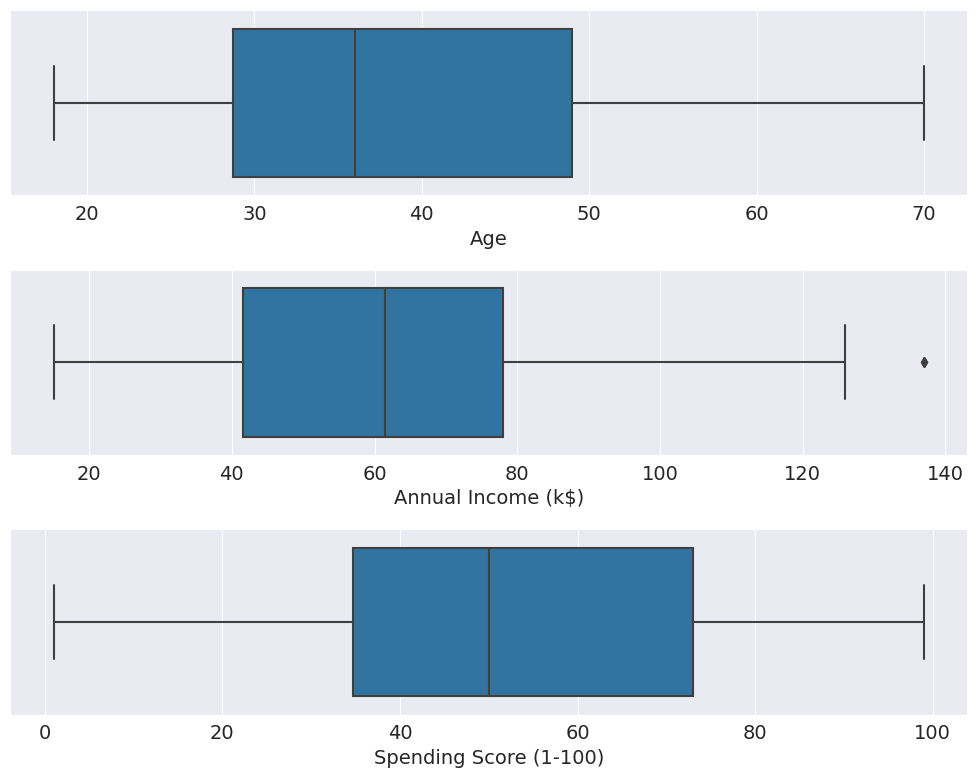

In [99]:
fig, axs = plt.subplots(3, figsize=(10, 8))
ax1 = sns.boxplot(data = customer_data, x='Age', ax=axs[0])
pax2 = sns.boxplot(data = customer_data, x='Annual Income (k$)', ax=axs[1])
ax3 = sns.boxplot(data = customer_data, x='Spending Score (1-100)', ax=axs[2])
plt.tight_layout()

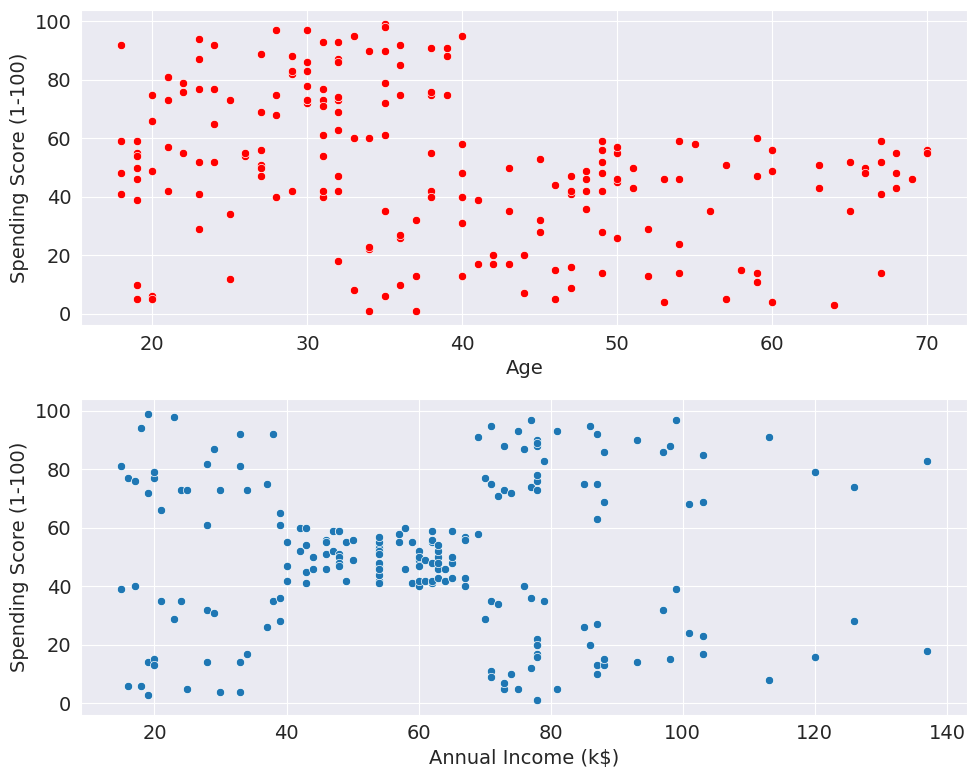

In [100]:
from matplotlib import colors
fig, axs = plt.subplots(2, figsize=(10, 8))
ax1 = sns.scatterplot(data = customer_data, x='Age', y='Spending Score (1-100)', ax=axs[0], color='red')
ax2 = sns.scatterplot(data = customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', ax=axs[1])
plt.tight_layout()
plt.show()

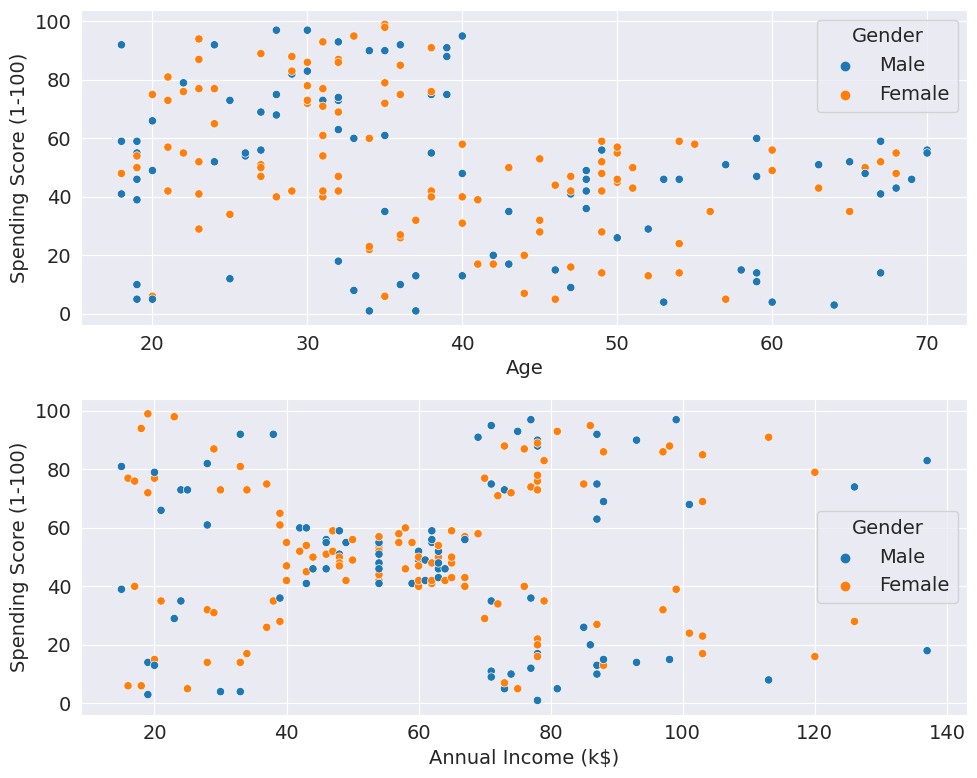

In [101]:
from matplotlib import colors
fig, axs = plt.subplots(2, figsize=(10, 8))
ax1 = sns.scatterplot(data = customer_data, x='Age', y='Spending Score (1-100)', ax=axs[0], color='red', hue='Gender')
ax2 = sns.scatterplot(data = customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', ax=axs[1], hue='Gender')
plt.tight_layout()
plt.show()

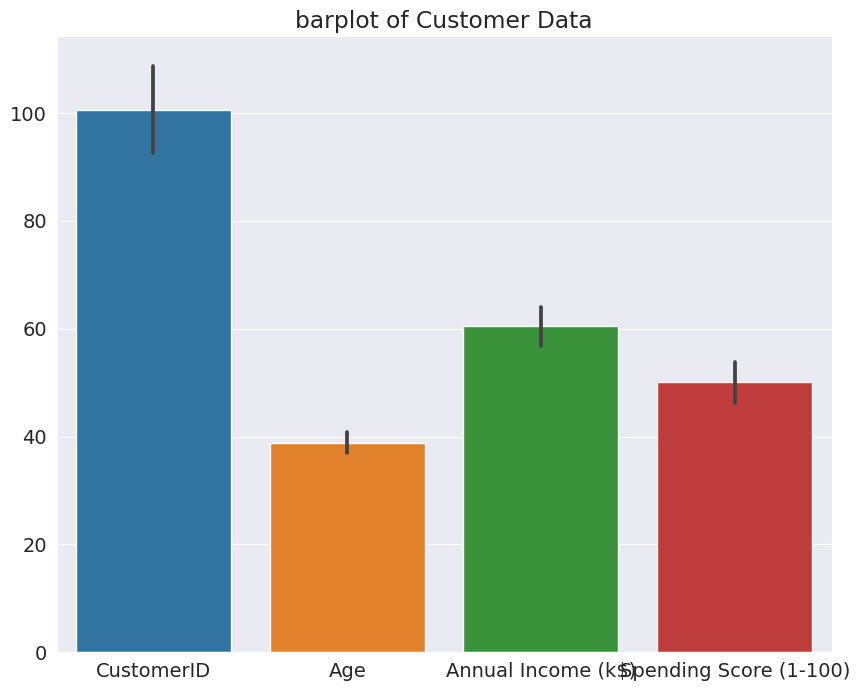

In [102]:
plt.figure( figsize=(10, 8))
sns.barplot(data=customer_data)
plt.title('barplot of Customer Data')
plt.show()

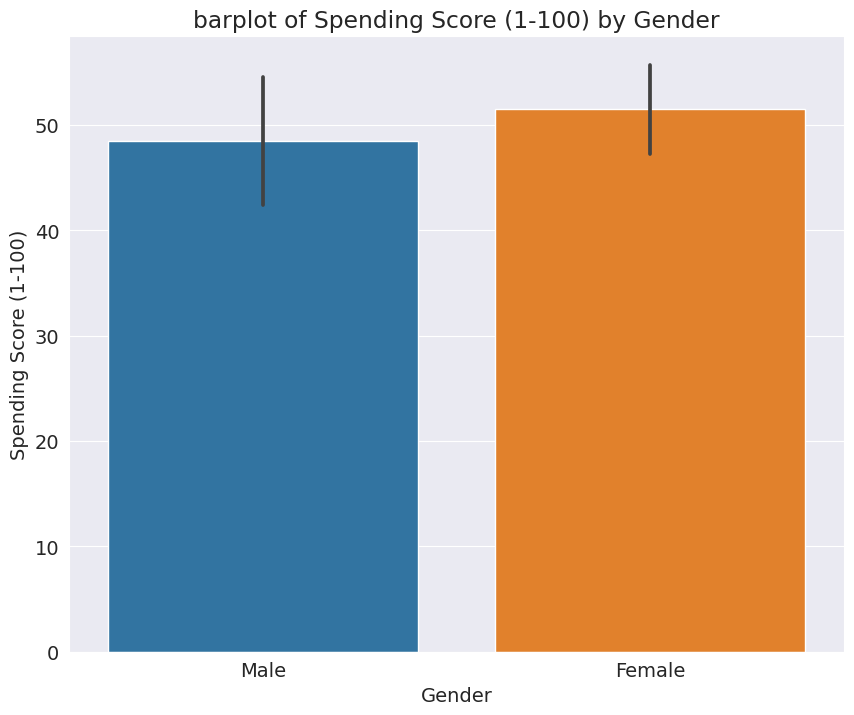

In [103]:
plt.figure( figsize=(10, 8))
sns.barplot(data=customer_data, y = 'Spending Score (1-100)',x='Gender')
plt.title('barplot of Spending Score (1-100) by Gender')
plt.show()

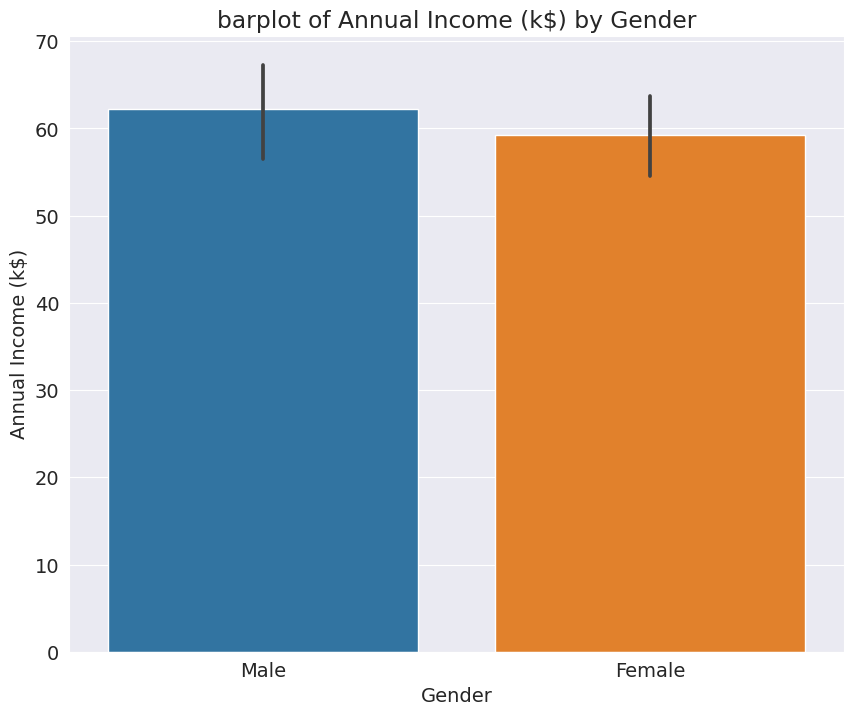

In [104]:
plt.figure( figsize=(10, 8))
sns.barplot(data=customer_data, y = 'Annual Income (k$)',x='Gender')
plt.title('barplot of Annual Income (k$) by Gender')
plt.show()

In [105]:
# use specific features
x = customer_data[customer_data.columns[2:]]

#Create KMeans Model

In [106]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)
predicted = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [107]:
predicted

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [108]:
customer_data['Groupe_label'] = predicted

In [109]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Groupe_label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


#Plot Scatter to Groups of data with colors according label

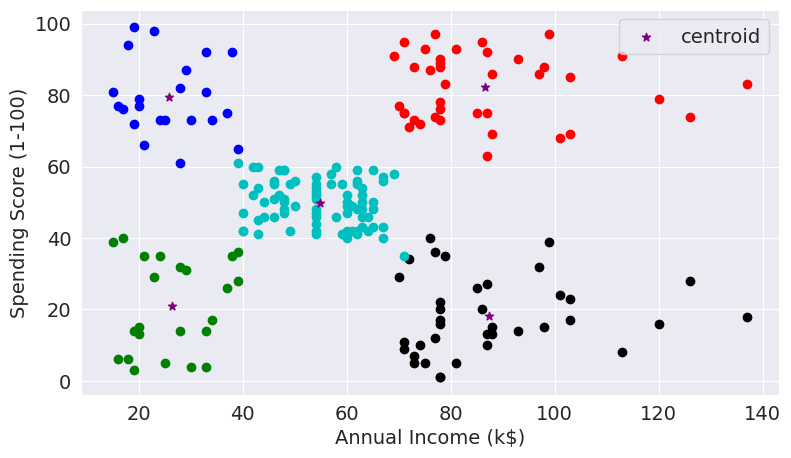

In [112]:
df1 = customer_data[customer_data.Groupe_label==0]
df2 = customer_data[customer_data.Groupe_label==1]
df3 = customer_data[customer_data.Groupe_label==2]
df4 = customer_data[customer_data.Groupe_label==3]
df5 = customer_data[customer_data.Groupe_label==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='c')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='blue')
plt.scatter(model.cluster_centers_[:,1],model.cluster_centers_[:,2],color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()